In [36]:

from utils import fit_scaling_laws, plot_actual_vs_predicted

from experiments.evals.task_configs import CORE_TASKS, convert_to_task_metrics

ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
# RUNS = [
#     "tootsie-scaling-512-81c36c",
#     "tootsie-scaling-768-d17a90",
#     "tootsie-scaling-1024-f4e4be",
#     "tootsie-scaling-1536-e2a6d8",
#     "tootsie-scaling-2048-72c648",
# ]

RUNS = [
    "scaling-law-suite-default-v2-512-4d173f",
    "scaling-law-suite-default-v2-768-12373d",
    "scaling-law-suite-default-v2-1024-77c98b",
    "scaling-law-suite-default-v2-1536-18344d",
    "scaling-law-suite-default-v2-2048-7845a1",

]

DEFAULT_RUNS = [
    "scaling-law-suite-default-512-9b1182",
    "scaling-law-suite-default-768-0631eb",
    "scaling-law-suite-default-1024-e6a4e5",
    "scaling-law-suite-default-1536-51914a",
    "scaling-law-suite-default-2048-14ef39",
]

DOLMA_RUNS = [
    "scaling-law-suite-dolma-v2-512-b899a2",
    "scaling-law-suite-dolma-v2-768-7d27cb",
    "scaling-law-suite-dolma-v2-1024-b13520",
    "scaling-law-suite-dolma-v2-1536-ace8cb",
    "scaling-law-suite-dolma-v2-2048-ea678e",
]

TOKEN_FILTERS = {
    "scaling-law-suite-default-v2-512-4d173f": 5.0e10,  # 50B tokens
    "scaling-law-suite-default-v2-768-12373d": 7.0e10,  # 70B tokens
    "scaling-law-suite-default-v2-1024-77c98b": 1.0e11, # 100B tokens
    "scaling-law-suite-default-v2-1536-18344d": 2.1e11, # 210B tokens
    "scaling-law-suite-default-v2-2048-7845a1": 2.1e11, # 210B tokens
}

# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

PRED_70B_RRUN = "llama-70b-tootsie-dummy-testing-986d5d"
PRED_22B_RUN = "llama-13b-tootsie-dummy-testing-214059"
PRED_13B_RUN = "llama-22b-tootsie-dummy-testing-373d53"

DOLMA_8B_PRED_RUN = "llama-8b-tootsie-dolma-0.001-565941"

# define the eval task loss metric
TASK_LOSSES = ["eval/paloma/c4_en/bpb"]
BPBS = []
for task in CORE_TASKS:
    if task.name == "lambada_openai" or task.name == "agieval_lsat_ar":
        continue

    print("Handling ", task.name)
    BPBS += [task for task in convert_to_task_metrics([task], metric="bpb")]
print(BPBS)
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"#"filtered" #"all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_10shot/acc"

ACCS = convert_to_task_metrics(CORE_TASKS, metric="acc")


Handling  arc_easy
Handling  arc_challenge
Handling  boolq
Handling  commonsense_qa
Handling  copa
Handling  hellaswag
Handling  hellaswag
Handling  openbookqa
Handling  piqa
Handling  wsc273
Handling  winogrande
['lm_eval/arc_easy/bpb', 'lm_eval/arc_challenge/bpb', 'lm_eval/boolq/bpb', 'lm_eval/commonsense_qa/bpb', 'lm_eval/copa/bpb', 'lm_eval/hellaswag_0shot/bpb', 'lm_eval/hellaswag_10shot/bpb', 'lm_eval/openbookqa/bpb', 'lm_eval/piqa/bpb', 'lm_eval/wsc273/bpb', 'lm_eval/winogrande/bpb']


In [37]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [45]:
results = fit_scaling_laws(
    runs=RUNS,
    loss_metrics=TASK_LOSSES,
    accuracy_metrics=ACCS,
    entity=ENTITY,
    project=PROJECT,
    pred_run=PRED_RUN,
    use_log_for_ND=True,
    normalize_ND=True,
    count_embedding_params=False,
    #token_filters=TOKEN_FILTERS
)



Outlier filtering summary:
Total points: 45
Points within 2 std: 44
Points filtered: 1

Sample values before filtering:
First 5 values: [0.22173913 0.15652174 0.20434783 0.19130435 0.22173913]
Mean: 0.200, Std: 0.025

Outlier filtering summary:
Total points: 45
Points within 2 std: 41
Points filtered: 4

Sample values before filtering:
First 5 values: [0.81565657 0.82323232 0.81902357 0.8219697  0.82954545]
Mean: 0.776, Std: 0.164

Outlier filtering summary:
Total points: 45
Points within 2 std: 41
Points filtered: 4

Sample values before filtering:
First 5 values: [0.52559727 0.51109215 0.52730375 0.52047782 0.5162116 ]
Mean: 0.507, Std: 0.088

Outlier filtering summary:
Total points: 45
Points within 2 std: 41
Points filtered: 4

Sample values before filtering:
First 5 values: [0.78195719 0.77094801 0.77155963 0.77461774 0.78929664]
Mean: 0.764, Std: 0.122

Outlier filtering summary:
Total points: 45
Points within 2 std: 41
Points filtered: 4

Sample values before filtering:
First 5

Relative Errors:
--------------------------------------------------
eval/paloma/c4_en/bpb: 1.18%
lm_eval/agieval_lsat_ar/acc_from_eval/paloma/c4_en/bpb: 17.06%
lm_eval/arc_easy/acc_from_eval/paloma/c4_en/bpb: 1.70%
lm_eval/arc_challenge/acc_from_eval/paloma/c4_en/bpb: 27.47%
lm_eval/boolq/acc_from_eval/paloma/c4_en/bpb: 15.83%
lm_eval/commonsense_qa/acc_from_eval/paloma/c4_en/bpb: 71.68%
lm_eval/copa/acc_from_eval/paloma/c4_en/bpb: 9.00%
lm_eval/hellaswag_0shot/acc_from_eval/paloma/c4_en/bpb: 0.66%
lm_eval/hellaswag_10shot/acc_from_eval/paloma/c4_en/bpb: 0.49%
lm_eval/lambada_openai/acc_from_eval/paloma/c4_en/bpb: 0.99%
lm_eval/openbookqa/acc_from_eval/paloma/c4_en/bpb: 6.21%
lm_eval/piqa/acc_from_eval/paloma/c4_en/bpb: 0.80%
lm_eval/wsc273/acc_from_eval/paloma/c4_en/bpb: 47.09%
lm_eval/winogrande/acc_from_eval/paloma/c4_en/bpb: 11.46%
eval/paloma/c4_en/bpb
[0.88075703 0.84879279 0.83596116 0.8281104  0.82302022 0.81882006
 0.81641668 0.81367987 0.81223959 0.8107903  0.80884665 0.80795

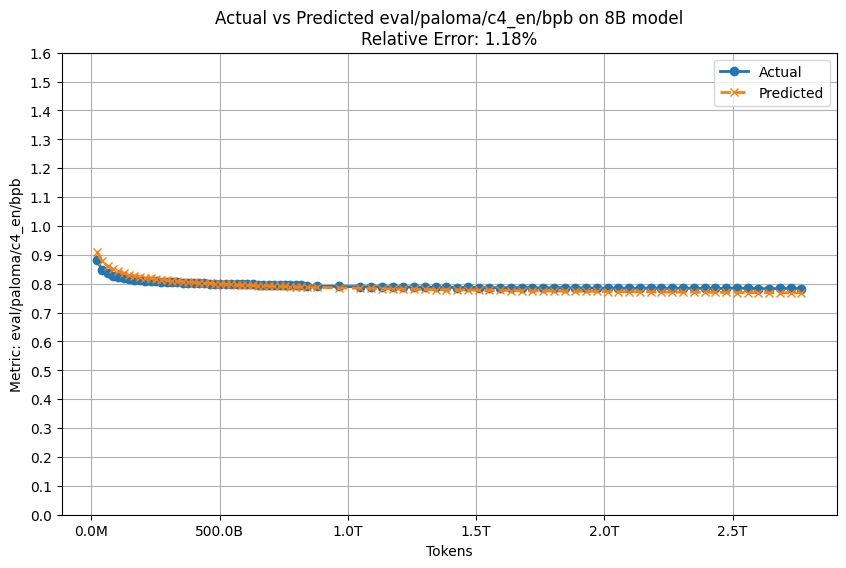

In [46]:
_, predictions = results
loss_results, accuracy_results, loss_tokens, acc_tokens, relative_errors = predictions

print("Relative Errors:")
print("-" * 50)
for metric, error in relative_errors.items():
    print(f"{metric}: {error:.2f}%")

for loss_metric, (actual, predicted) in loss_results.items():
    print(loss_metric)
    print(actual)
    print(predicted)

    plot_actual_vs_predicted(actual, predicted, title=f"Actual vs Predicted {loss_metric} on 8B model\nRelative Error: {relative_errors[loss_metric]:.2f}%",
                    task_metric=loss_metric,
                    tokens=loss_tokens,
                    y_max=1.5)

lm_eval/agieval_lsat_ar/acc_from_eval/paloma/c4_en/bpb
[0.22173913 0.15652174 0.20434783 0.19130435 0.22173913 0.17826087
 0.21304348 0.20434783 0.1826087  0.19565217 0.2173913  0.20434783
 0.21304348 0.19130435 0.26086957 0.20434783 0.19130435 0.17826087
 0.17391304 0.24347826 0.23043478 0.24347826 0.20869565 0.2
 0.21304348 0.23043478 0.19130435 0.18695652 0.19565217 0.15652174
 0.22173913 0.1826087  0.23043478 0.23043478 0.23043478 0.23043478
 0.2        0.15652174 0.19130435 0.17826087 0.17826087 0.18695652
 0.17826087 0.16086957 0.16086957]
[0.22800959 0.2280097  0.2280099  0.22801007 0.22801014 0.22801021
 0.22801028 0.22801035 0.22801041 0.22801047 0.22801052 0.22801057
 0.22801062 0.22801067 0.22801072 0.22801076 0.2280108  0.22801084
 0.22801088 0.22801092 0.22801095 0.22801099 0.22801102 0.22801105
 0.22801108 0.22801111 0.22801114 0.22801117 0.2280112  0.22801122
 0.22801125 0.22801127 0.2280113  0.22801132 0.22801134 0.22801136
 0.22801139 0.22801141 0.22801143 0.22801145 0

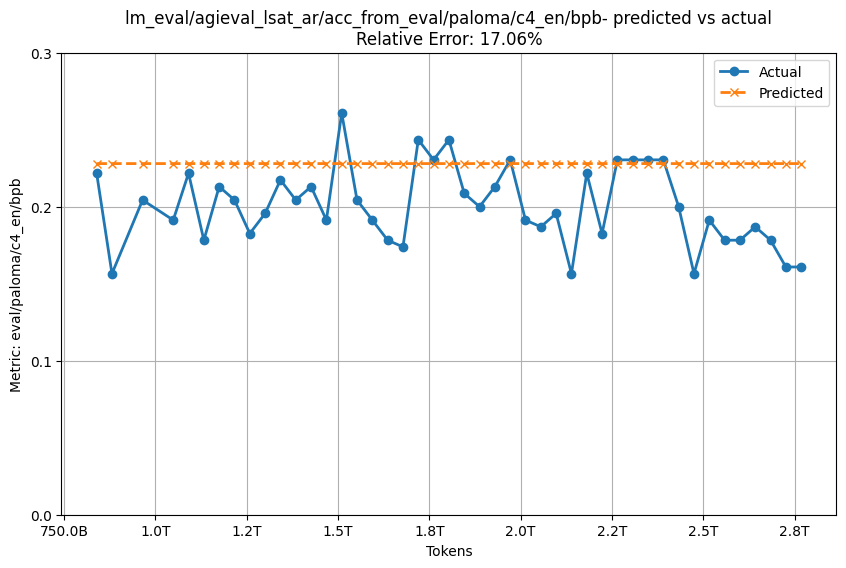

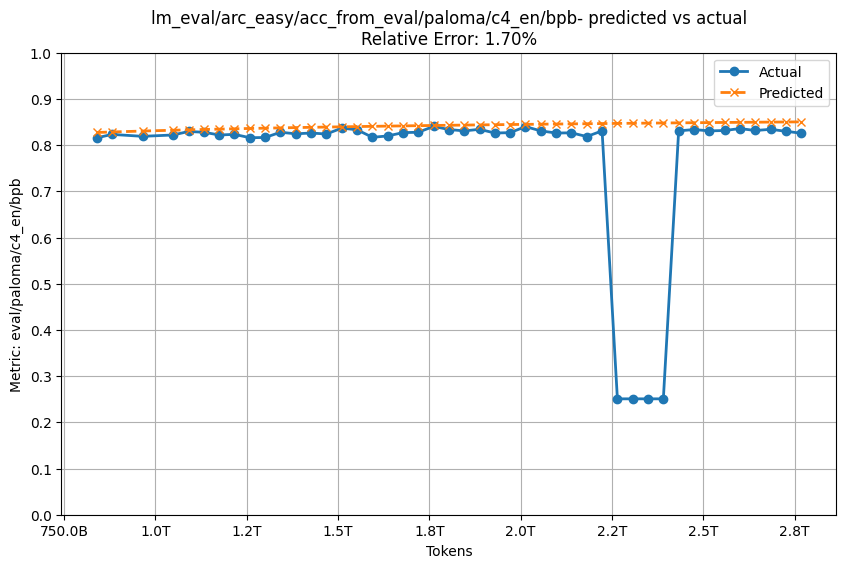

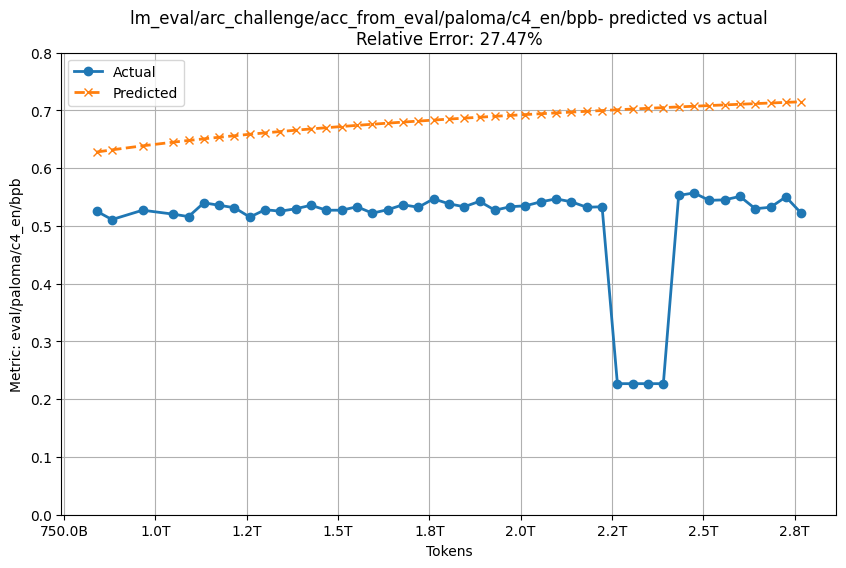

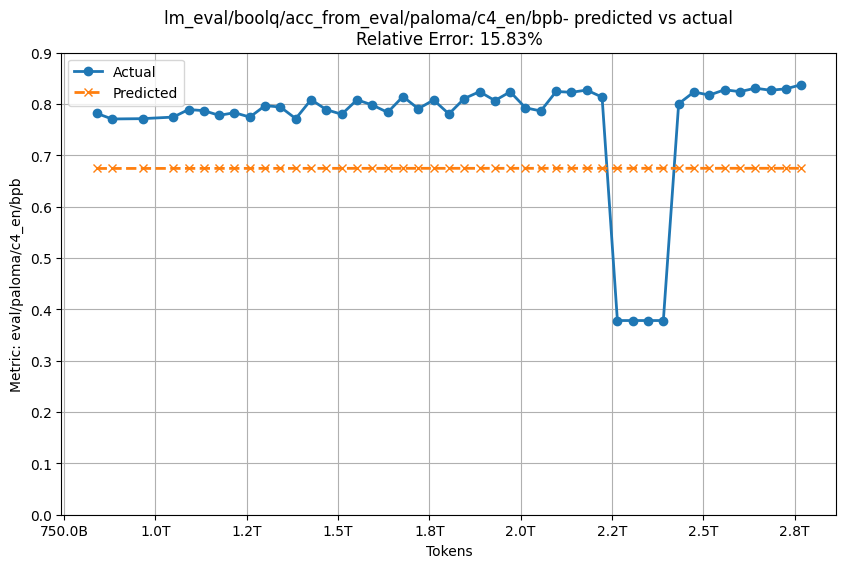

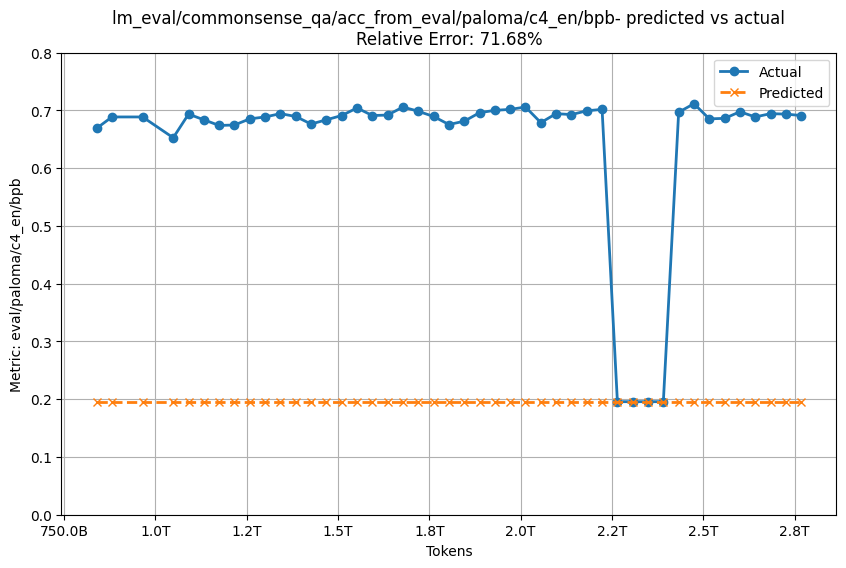

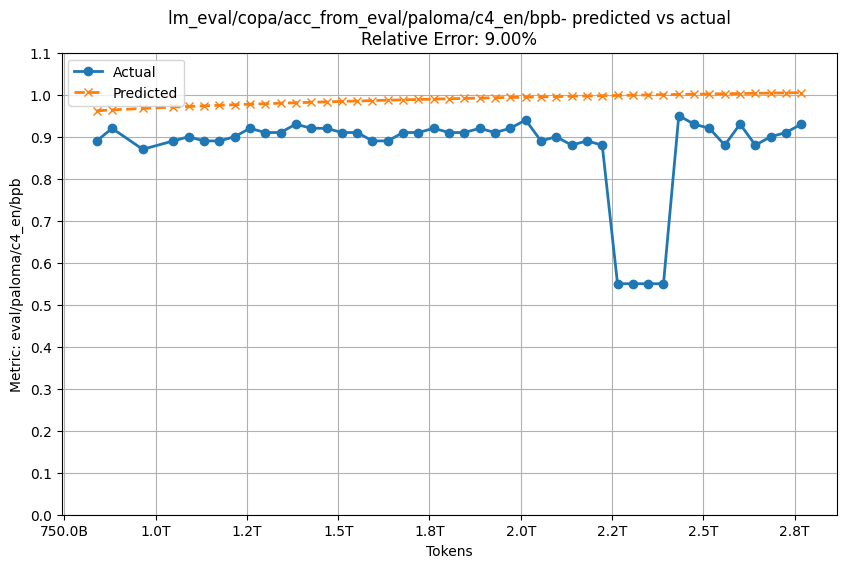

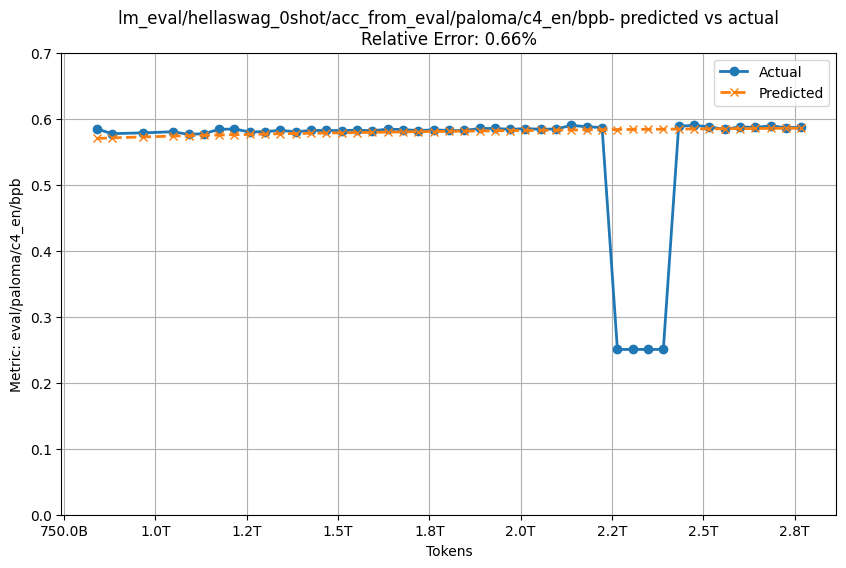

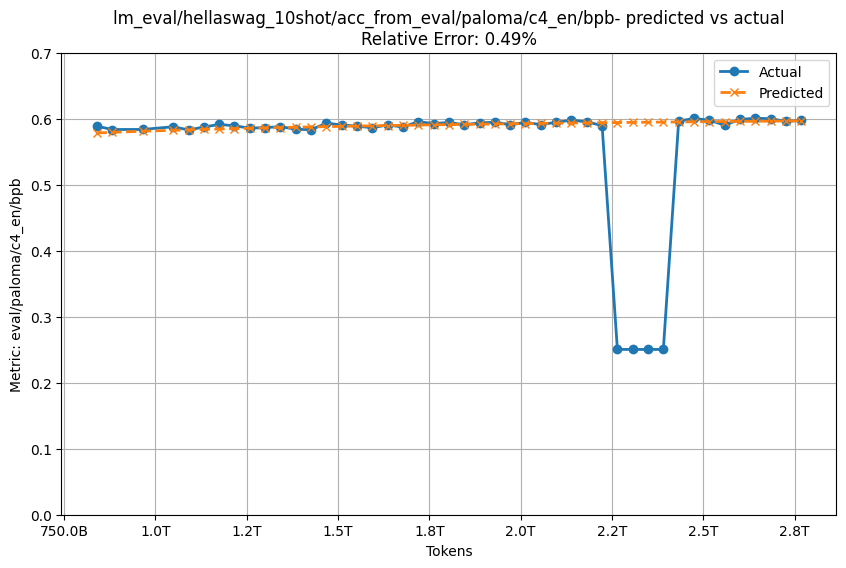

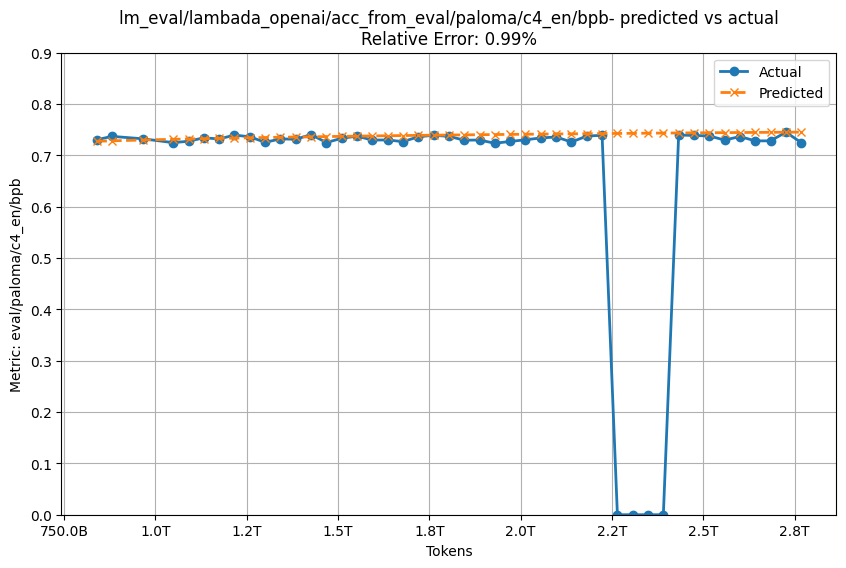

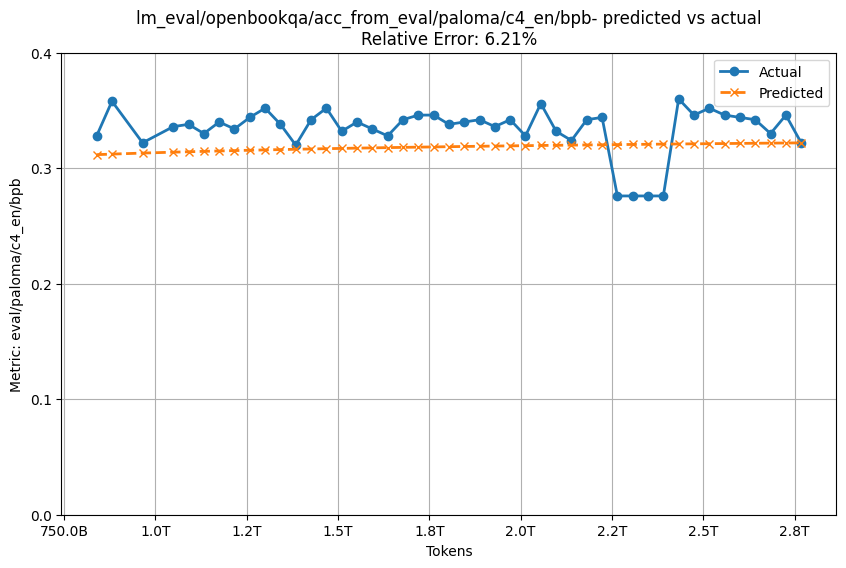

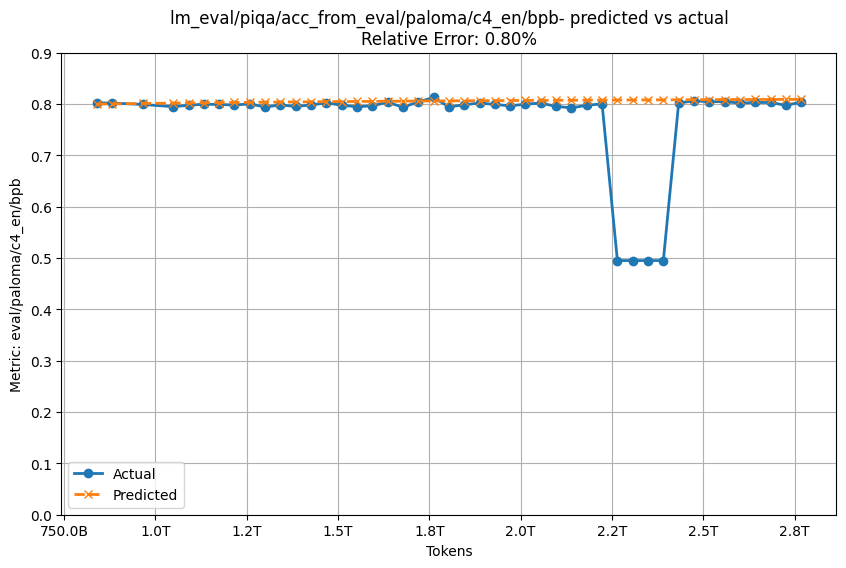

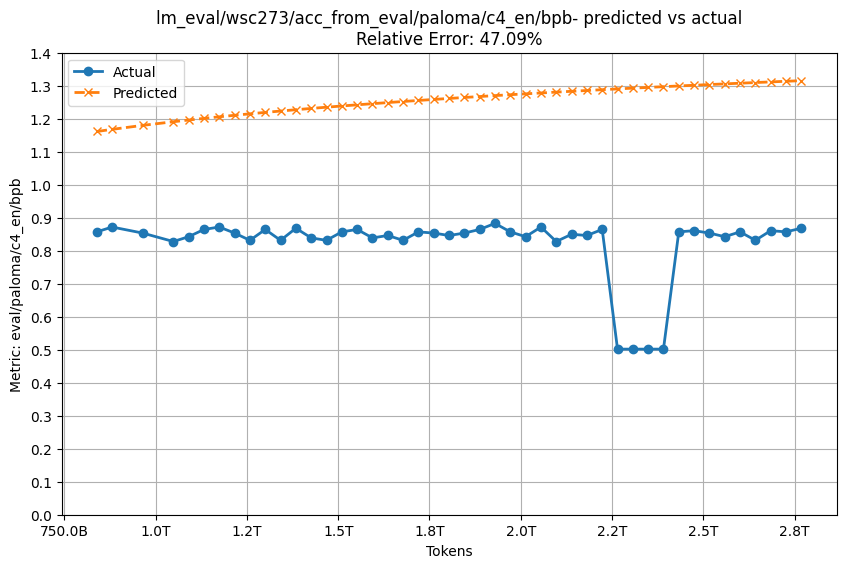

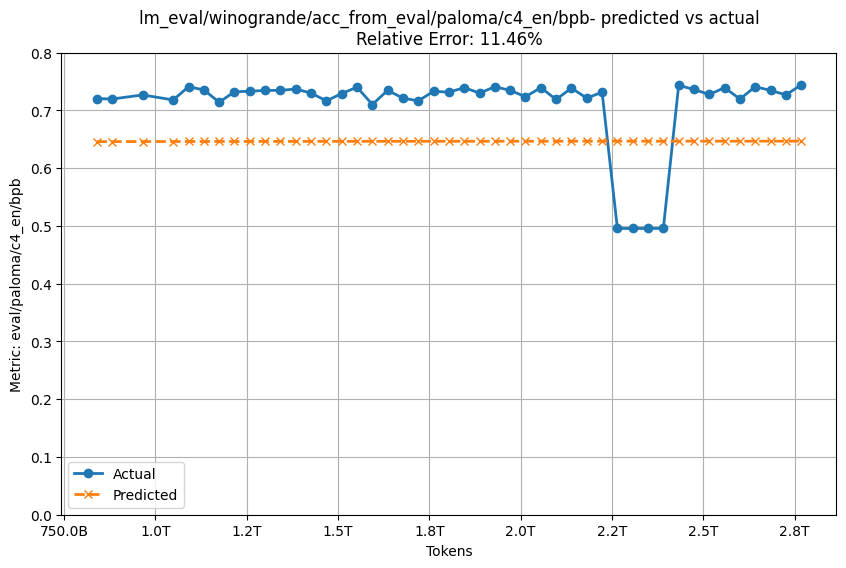

In [47]:
for index, (acc_metric, (actual, predicted)) in enumerate(accuracy_results.items()):
    print(acc_metric)
    print(actual)
    print(predicted)

    # plot actual vs predicted
    # if index == 9:
    plot_actual_vs_predicted(actual, predicted, title=f"{acc_metric}- predicted vs actual\nRelative Error: {relative_errors[acc_metric]:.2f}%", task_metric=loss_metric,
                    tokens=acc_tokens,)
        #break

